- Crear un wordcloud básico de uno o varios documentos de texto
- Ajustar el color, el tamaño y la cantidad de texto dentro de un wordcloud
- Enmascarar tu wordcloud en cualquier forma de tu elección
- Enmascarar tu wordcloud en cualquier patrón de color de tu elección

In [153]:
# ALVARO PACOMPIA LERMA 
# Cargando las librerias necesarias
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [154]:
# Cargando el dataframe
df = pd.read_csv("cancions.csv", index_col=0)

In [155]:
# Primeras 3 filas del conjunto de datos
df.head(10)

,nombre,año,titulo,cancion
id,,,,
0,pedro suarez vertiz,2004.0,lo olvide,Sé que debí tomar tu mano \r\nCuando solíamos ...
1,jean marco,2018.0,empecemos a vivir,"Soy feliz contigo, agua de mi sed Viajan mis c..."
2,jean marco,2018.0,tu no te imaginas,tu paciencia y mi silencio Decidieron terminar...
3,William luna moscoso,1999.0,vienes y te vas,"yo no quiero verme contigo, No sabes cuánto su..."
4,William Luna Moscoso,2000.0,Niñachay,"Niñachay, dijiste que me querías\r\nNiñachay, ..."
5,william Luna Moscoso,2008.0,Como Si no supiera,"Te miro a los ojos, como si no supiera\r\nEscu..."
6,Pedro Suares Vertis,2004.0,cuando pienses en Volver,Cuando pienses en volver\r\nAquí están tus ami...
7,Gian Marco,2018.0,Sacala a bailar,"Llego la noche, todo comienza \r\nLa que te gu..."
8,Gian Marco,2002.0,Sentirme Vivo,voy a hacer\r\nuna ronda por tu cumpleaños\r\n...


In [156]:
# Imprimiendo información básica sobre el conjunto de datos usando las funciones print() y .format()

print("Existen {} observaciones y {} caracteristicas en este conjunto de datos. \n".format(df.shape[0],df.shape[1]))
print("Existen {} distintos tipos de cantantes, tales como: {}... \n".format(len(df.nombre.unique()),
                                                                           ", ".join(df.nombre.unique()[0:3])))
print("Existen {} mostrando como titulo de sus canciones como: {}... \n".format(len(df.titulo.unique()),
                                                                                      ", ".join(df.titulo.unique()[0:3])))

Existen 30 observaciones y 4 caracteristicas en este conjunto de datos. 

Existen 11 distintos tipos de cantantes, tales como: pedro suarez vertiz, jean marco, William luna moscoso... 

Existen 13 mostrando como titulo de sus canciones como: lo olvide, empecemos a vivir, tu no te imaginas... 



In [157]:
# Imprimiendo información de paises, descripción y puntos
df[["nombre", "titulo","año","cancion"]].head(3)

,nombre,titulo,año,cancion
id,,,,
0,pedro suarez vertiz,lo olvide,2004.0,Sé que debí tomar tu mano \r\nCuando solíamos ...
1,jean marco,empecemos a vivir,2018.0,"Soy feliz contigo, agua de mi sed Viajan mis c..."
2,jean marco,tu no te imaginas,2018.0,tu paciencia y mi silencio Decidieron terminar...


In [158]:
# Agrupación por país
nombre = df.groupby("nombre")

# Resumen estadístico de todos los países.
nombre.describe().head()

año                                               \
                     count    mean  std     min     25%     50%     75%   
nombre                                                                    
 Anna Karina           3.0  2010.0  8.0  2002.0  2006.0  2010.0  2014.0   
 Gian Marco            1.0  2002.0  NaN  2002.0  2002.0  2002.0  2002.0   
 Pedro Suares Vertis   1.0  2004.0  NaN  2004.0  2004.0  2004.0  2004.0   
 loco amor             0.0     NaN  NaN     NaN     NaN     NaN     NaN   
Gian Marco             1.0  2018.0  NaN  2018.0  2018.0  2018.0  2018.0   

                              
                         max  
nombre                        
 Anna Karina          2018.0  
 Gian Marco           2002.0  
 Pedro Suares Vertis  2004.0  
 loco amor               NaN  
Gian Marco            2018.0

In [159]:
# Seleccionamos los 6 puntos promedio más altos entre los 44 países
nombre.mean().sort_values(by="año",ascending=False).head(6)

,año
nombre,
Gian Marco,2018.0
jean marco,2018.0
Anna Karina,2010.0
william Luna Moscoso,2008.0
Pedro Suares Vertis,2004.0
pedro suarez vertiz,2004.0


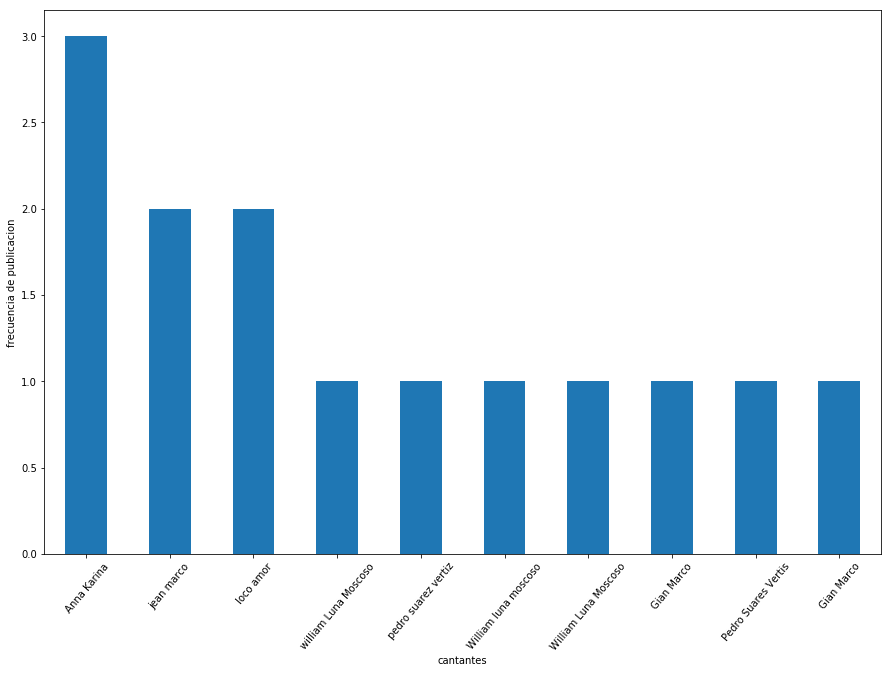

In [160]:
# Graficando el histograma de frecuencua de los paises y la cantidad de vinos
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
nombre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("cantantes")
plt.ylabel("frecuencia de publicacion")
plt.show()

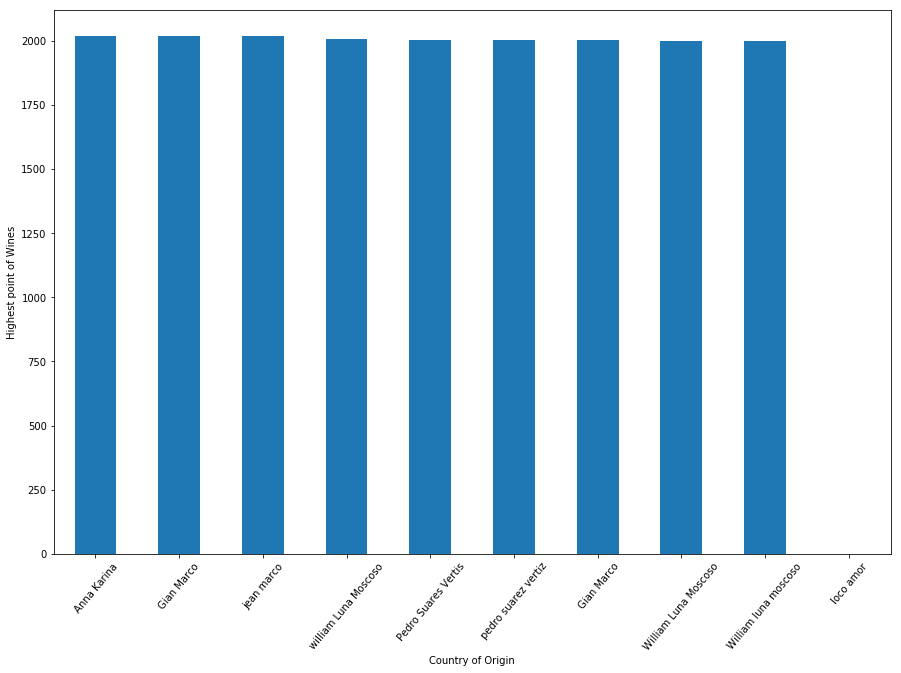

In [161]:
# Graficando el histograma de frecuencua de los paises y los puntos de los vinos
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
nombre.max().sort_values(by="año",ascending=False)["año"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [162]:
# Comencemos con una descrpción
text = df.cancion[0]
text

'Sé que debí tomar tu mano \r\nCuando solíamos caminar Sé que debí estar a tu lado Para algo más que disfrutar Lo olvidé, lo olvidé, lo olvidé Uhh, lo olvidé, lo olvidé, lo olvidé Uh-uh-uh Sé que debí dejar de lado Que la razón debía ganar Sé que debí no hacerme caso Sé que debí volver a amar'

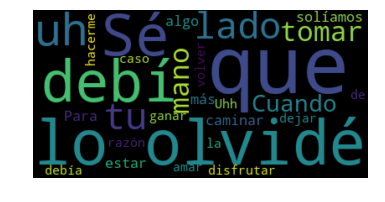

In [163]:
# Creando y generando una imagen de nube de palabras.
wordcloud = WordCloud().generate(text)

# Mostrando la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

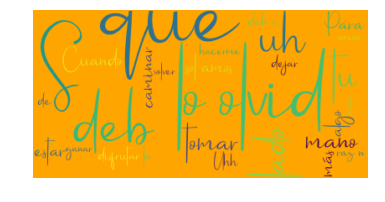

In [164]:
# Bajando el max_font_size, cambiando el número máximo de palabras y colocando un fodo de color y  la letra
wordcloud = WordCloud(max_font_size=90, max_words=150, font_path="letra1.ttf",background_color="Orange").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [165]:
# Guardando la imagen
wordcloud.to_file("salida1.png")

In [183]:
# Combinaciones de palabras de la columna description
text = " ".join(review for review in df.cancion)
print ("Hay ",len(text),"palabras en la combinación de todas las revisiones." )

TypeError: sequence item 12: expected str instance, float found

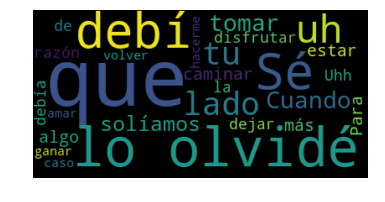

In [167]:
# Creando la lista stopwords a quitar:
stopwords = set(STOPWORDS)
stopwords.update(["mano"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ahora trabajaremos la imagen de mascara, para ello trabajemos la siguiente imagen
![titulo](img2.png)

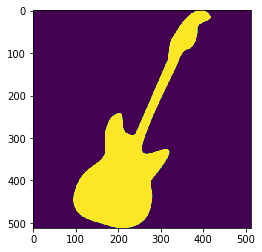

(512, 512)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [168]:
# Creamos un array de una imagen de mascara
wine_mask = np.array(Image.open("imagen7.png"))
plt.imshow(np.asarray(wine_mask))
plt.show()
print(wine_mask.shape)
wine_mask

In [184]:
# Función para transformar los valores a: 0 ó 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0

In [185]:
# Transforma la máscara en una nueva función
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [186]:
# Comprobando el resultado esperado de la máscara
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

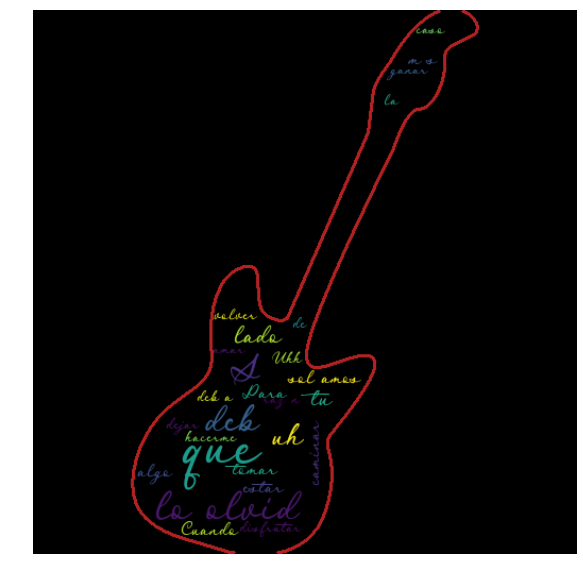

In [191]:
# Creando una imagen de nube de palabras
wc = WordCloud( font_path="letra2.ttf",background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("imagen7.png")

# store to file
wc.to_file("loba1.jpg")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [192]:
def transform_format(val):
    if val == 0:
        return 0
    else:

        return 255

In [193]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [194]:
transformed_wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

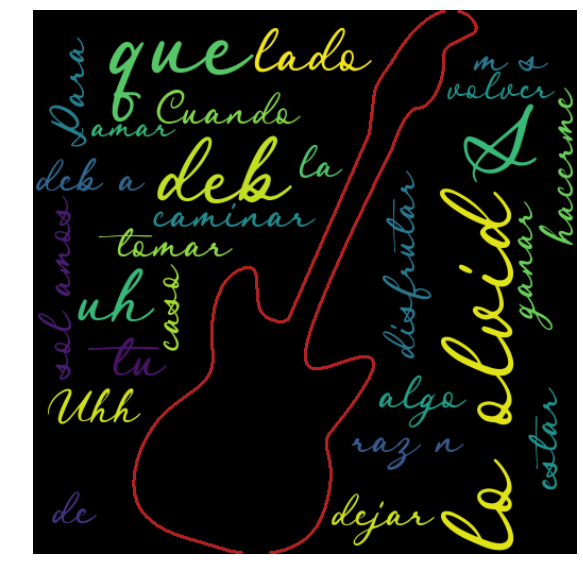

In [197]:
# Creando una imagen de nube de palabras
wc = WordCloud( font_path="letra2.ttf",background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("lob.jpg")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()